# Final Project: The Billiards Problem

## William Willmon

## Introduction

One chaotic sysytem that can be observed is a billiards ball rolling on a frictionless table. The table can be of any shape but for the sake of this project, two table shapes will be observed, stadium and elliptical. The balls on the table roll at a constant veloctiy in both the x and the y direction, the velocity being defined as the change in distance over a period time. The velocity is only changed when the ball collides with the walls of the table, this causes the ball to then reflect off the wall where the angle between the normal vector at that position onwall and the path of the ball both before and after collision is the smae. This collision in this problem is elastic, which means no energy is lost in the collision off the wall. Thus, the velocity parallel to the wall after the collision is same as the initial and the perpendicular velocity is the opposite as the initial perpendicular velocity. The purpose of this problem is to give a ball initial conditions and model the trajectory over time with respect to table shape.

## Model

The necessary equations based on Newtonian Mechanics consist of the first two equations, which are the velocity of the ball between the walls. These equations are stating the basic definitions of velocity in both the x and y direction.

$$
\frac{dx}{dt} = v_{x} 
$$

$$
\frac{dy}{dt} = v_{y}
$$

The second set of equation is used to describe the components of the velocity before it collides with the wall. The velocity is broken up into two vectors. The first being the vector perpendicular to the wall. This is measured by projecting the velocity vector onto the vector normal to the wall. We can then use the second equation which states that the parallel velocity is the velocity vector minus the perpendicular component. The image below is a similar illustration where the red vector is $\vec{v}_{i}$, the blue vector is $\hat{n}$, the green line is $\vec{v}_{i,\perp}$, and finally the purple line is $\vec{v}_{i,\parallel}$. 

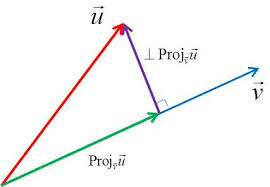

Below are the equation used in calculating the vectors above.

$$
\vec{v}_{i,\perp} = (\vec{v}_{i} \bullet \hat{n})\hat{n}
$$

$$
\vec{v}_{i,\parallel} = \vec{v}_{i} - \vec{v}_{i,\perp}
$$

The final set of equations gives us our velocity components after the collision. Due to the elasticity of the problem we are able to use a perfect reflection where the angle between the normal vector and the initial velocity is the same as the angle between the normal vector and the final velocity. With that being shown the final perpendicular component is the negative of the initial perpendicular component and the final parallel component is equal to the initial parallel component.

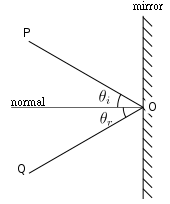

Shown above is a perfect reflection where the final and inital angles are equal. Using that concept of perfect reflection, the equations below are obtained.

$$
\vec{v}_{f,\perp} = -\vec{v}_{i,\perp}
$$

$$
\vec{v}_{f,\parallel} = \vec{v}_{i,\parallel}
$$

Using the equations above we will be looking at a few different scenerios. The first being the trajectory of the ball in a stadium table. This is a table that is similar to a rectangle but with semi-circles on either end, and the length, $\alpha$, of the rectangle can be changed. We will then test different shapes of tables such as and ellipse and a rectangle. For each table we will then test multiple initial conditions i.e. velocity and positions. 

The boundary conditions that must be considered are the size and shape of the table that the ball is on, the initial velocity of the ball is greater than 0, and the $\alpha $ of the stadium table is greater than or equal to zero.

In [1]:
import math
import numpy as np
from matplotlib.pylab import plt
% matplotlib inline
    
    
def v(xi,xf,ti,tf):
    '''Velocity as a function of time
    
    Arguments:
    xi - initial position
    xf - final position
    ti - initial time
    tf - final time
    
    Returns:
    Velocity as a function of time
    
    Examples:
    >>> v(0,2,0,1)
    2
    
    >>> v(2,5,2,3)
    3
    '''
    return (xf-xi)/(tf-ti)

def reflect(vi,n):
    '''Return initial and final values for the velocity components perpendicular
    and parallel to the tangent of the wall.
    
    Argument:
    vi - initial velocity vector
    n - normal vector to the tangent
    
    Returns:
    v_iperp - initial perpendicular velocity component
    v_fperp - final perpendicular velocity component
    v_ipara - initial parallel velocity component
    v_fpara - final parallel velocity component
    
    Examples:
    >>> vi_perp_para([-1,-1],[-1,1])
    [0,-1],[0,1],[-1,0],[-1,0]
    '''
    v_iperp = np.dot(np.dot(vi,n),n)
    v_fperp = -v_iperp
    v_ipara = vi - v_iperp
    v_fpara = v_ipara
    
    return v_iperp,v_fperp,v_ipara,v_fpara


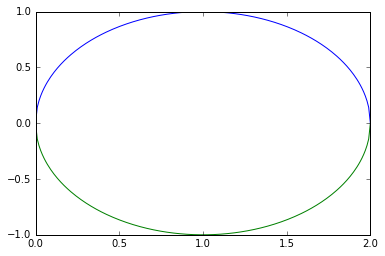

In [20]:
def stadiumtable(radius,alpha,order=1):
    '''Return x and y values for a a stadium table with a width of two times
    the radius and the two semicircles seperated by a length alpha
    
    Argument:
    R - Radius of semicircles at end of table (m)
    alpha - length of rectangular portion of table (m)
    order(optional) - determines type of table
     
    Returns:
    y_up - upper y values of the table
    y_down - lower y values of the table
    x - x values for the table
    
    Examples:
    >>> vi_perp_para(1,0,order=1)
    Circle of Radius 1
    '''
    x_end = 2*radius+alpha
    x = np.linspace(0,x_end,x_end*100)
    y_up = []
    y_down = []
    
    if order == 1:
    
        for i in x:
            if i < radius:
                y_up.append(math.sqrt(radius-(i-radius)**2))
                y_down.append(-1*math.sqrt(radius-(i-radius)**2))
            elif i >= radius and i <= (radius + alpha):
                y_up.append(radius)
                y_down.append(-1*radius)
            elif i > (radius + alpha) and i <= x_end:
                inew  = i - alpha
                y_up.append(math.sqrt(radius-(inew-radius)**2))
                y_down.append(-1*(math.sqrt(radius-(inew-radius)**2)))
        return y_up,y_down,x

yup,ydown,x = stadiumtable(1,0,order=1)

plt.plot(x,yup)
plt.plot(x,ydown)

In [23]:
def billiards(V,theta,Xi,Yi,R,alpha):
    '''Return x and y points for a billiard ball rolling along a frictionless table 
    and bouncing off the walls. The ball is given initial conditions and based off 
    conditions moves chaotically about the table.
    
    Argument:
    V - inital velocity magnitude (m/s)
    theta - inital angle of velocity from horizontal (rad)
    Xi - initial x value (m)
    Yi - initial y value (m)
    R - Radius of semicircles at end of table (m)
    alpha - length of rectangular portion of table (m)
    
    Returns:
    x_points - the x values of the ball over time
    y_points - the y values of the ball over time
    
    Examples:
    '''
    Vy = math.sin(theta)*V
    Vx = math.cos(theta)*V

    t = np.linspace(0,100,1000)
    dt = 0.1
    x_points = []
    y_points = []
    
    for i in range(0,10000): 
        Xf = dt*Vx + Xi
        Yf = dt*Vy + Yi
        
        if (dt == 0.1):
            if Xf > R and Xf < (R+alpha):
                if abs(Yf) < R:
                    x_points.append(Xf)
                    y_points.append(Yf)
                    Xi = Xf
                    Yi = Yf
                    dt = 0.1
                    
            elif Xf < R:
                y = math.sqrt(R-(Xf-R)**2)
                
                if abs(Yf) < y:
                    x_points.append(Xf)
                    y_points.append(Yf)
                    Xi = Xf
                    Yi = Yf
                    dt = 0.1

            elif Xf > (R+alpha) and Xf < (2*R+alpha):
                y = math.sqrt(R-((Xf-alpha)-R)**2)
                
                if abs(Yf) < y:
                    x_points.append(Xf)
                    y_points.append(Yf)
                    Xi = Xf
                    Yi = Yf
                    dt = 0.1
                    
            elif Xf > R and Xf < (R+alpha):
                    if abs(Yf) > R:
                        x_points.append(Xf)
                        y_points.append(Yf)
                        Xi = Xf
                        Yi = Yf
                        dt = 0.1
                        Vy = -Vy

            elif Xf < R:
                y = math.sqrt(R-(Xf-R)**2)

                if abs(Yf) > y:  
                    n = [-Xf+R,-Yf]
                    Vi = [Vx,Vy]
                    theta_n = np.arccos(np.inner(Vi,n)/math.sqrt(np.inner(Vi,Vi)*np.inner(n,n)))

                    theta_vert = np.arctan(n[0]/n[1])

                    if theta_n >= theta_vert:
                        theta_prime = theta_n - theta_vert
                        Vfn = [n[1]*math.tan(theta_n),-n[1]] 

                    else:
                        theta_prime = theta_vert - theta_n
                        Vfn = [n[1]*math.tan(theta_n),n[1]]

                    n_Vf = [Vfn[0]/math.sqrt(np.inner(Vfn,Vfn)),Vfn[1]/math.sqrt(np.inner(Vfn,Vfn))]
                    Vf = [math.sqrt(np.inner(Vi,Vi))*n_Vf[0],math.sqrt(np.inner(Vi,Vi))*n_Vf[1]]

                    Vx = Vf[0]
                    Vy = Vf[1]
                    x_points.append(Xf)
                    y_points.append(Yf)
                    Xi = Xf
                    Yi = Yf
                    dt = 0.1

            elif Xf > (R+alpha) and Xf < (2*R+alpha):
                y = math.sqrt(R-((Xf-alpha)-R)**2)

                if abs(Yf) > y:
                    n = [-Xf-R-alpha,-Yf]
                    Vi = [Vx,Vy]
                    theta_n = np.arccos(np.inner(Vi,n)/math.sqrt(np.inner(Vi,Vi)*np.inner(n,n)))

                    theta_vert = np.arctan(n[0]/n[1])

                    if theta_n >= theta_vert:
                        theta_prime = theta_n - theta_vert
                        Vfn = [n[1]*math.tan(theta_n),n[1]] 

                    else:
                        theta_prime = theta_vert - theta_n
                        Vfn = [n[1]*math.tan(theta_n),-n[1]]

                    n_Vf = [Vfn[0]/math.sqrt(np.inner(Vfn,Vfn)),Vfn[1]/math.sqrt(np.inner(Vfn,Vfn))]
                    Vf = [math.sqrt(np.inner(Vi,Vi))*n_Vf[0],math.sqrt(np.inner(Vi,Vi))*n_Vf[1]]

                    Vx = Vf[0]
                    Vy = Vf[1]
                    x_points.append(Xf)
                    y_points.append(Yf)
                    Xi = Xf
                    Yi = Yf
                    dt = 0.1
                    
    return x_points,y_points

'print(Ytest)\nprint(Xtest)'

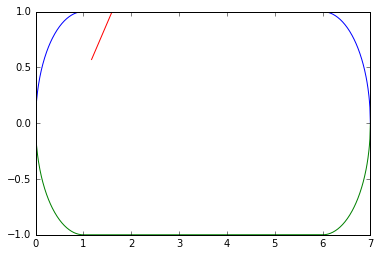

In [24]:
Xtest,Ytest = billiards(1,math.pi/4,1.1,0.5,1,5)
yup,ydown,x = stadiumtable(1,5,order=1)

plt.plot(x,yup)
plt.plot(x,ydown)
plt.plot(Xtest,Ytest)
'''print(Ytest)
print(Xtest)'''